## College RF DT

### Read and understand data

In [1]:
library(ISLR)

In [2]:
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [3]:
df <- College

In [4]:
str(df)

'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

### EDA

In [5]:
library(ggplot2)

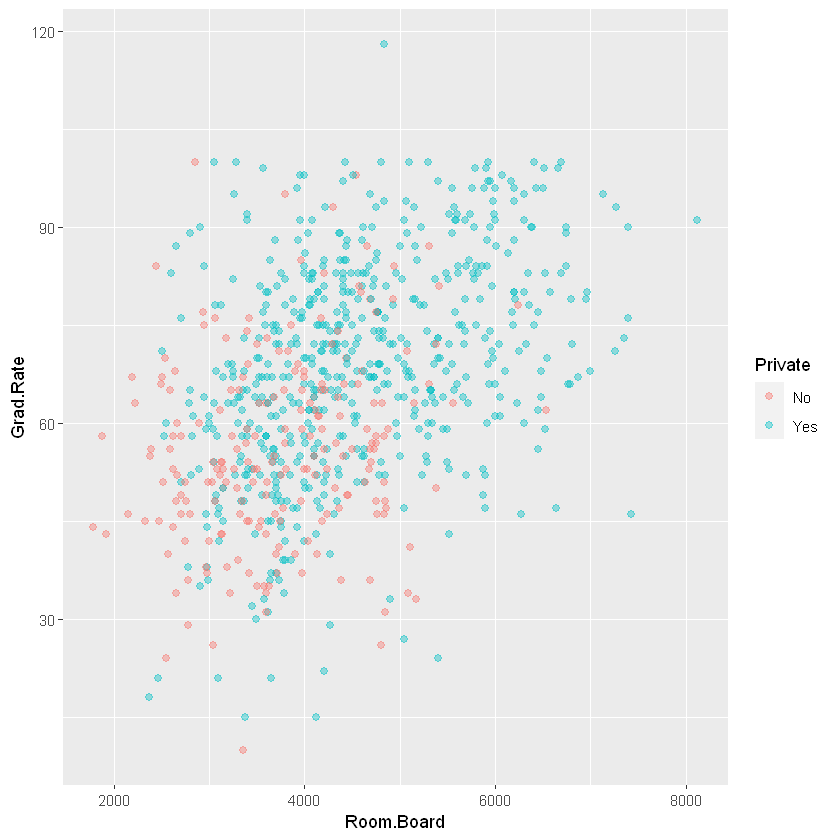

In [6]:
ggplot(df, aes(Room.Board,Grad.Rate)) + geom_point(aes(color=Private), size=2, alpha=0.4)

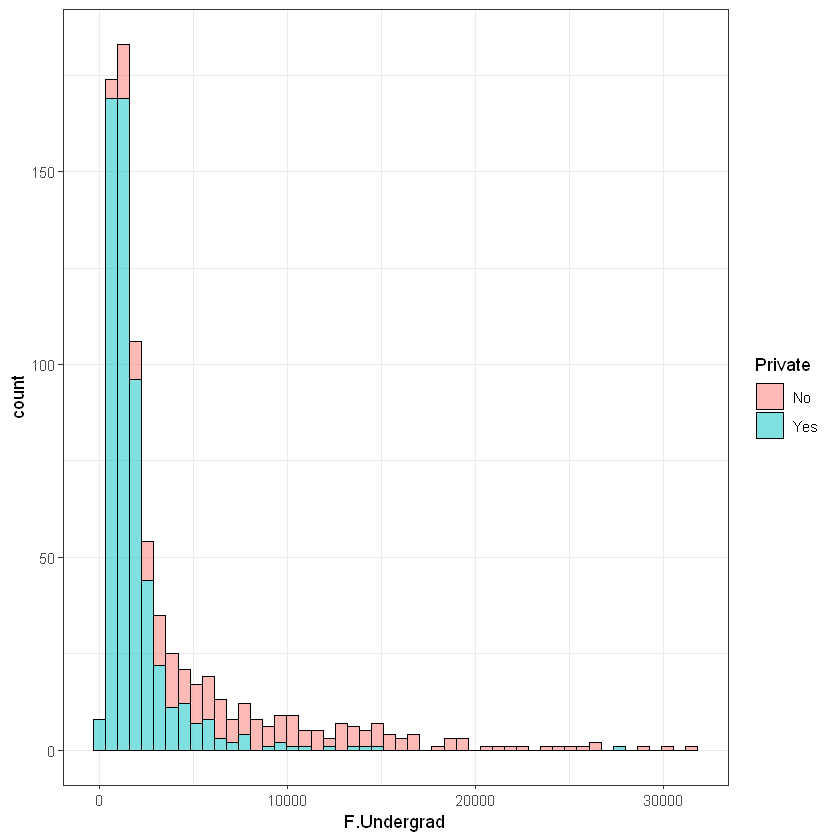

In [7]:
ggplot(df, aes(F.Undergrad)) + geom_histogram(aes(fill=Private), color='black', bins=50, alpha=0.5) +theme_bw()

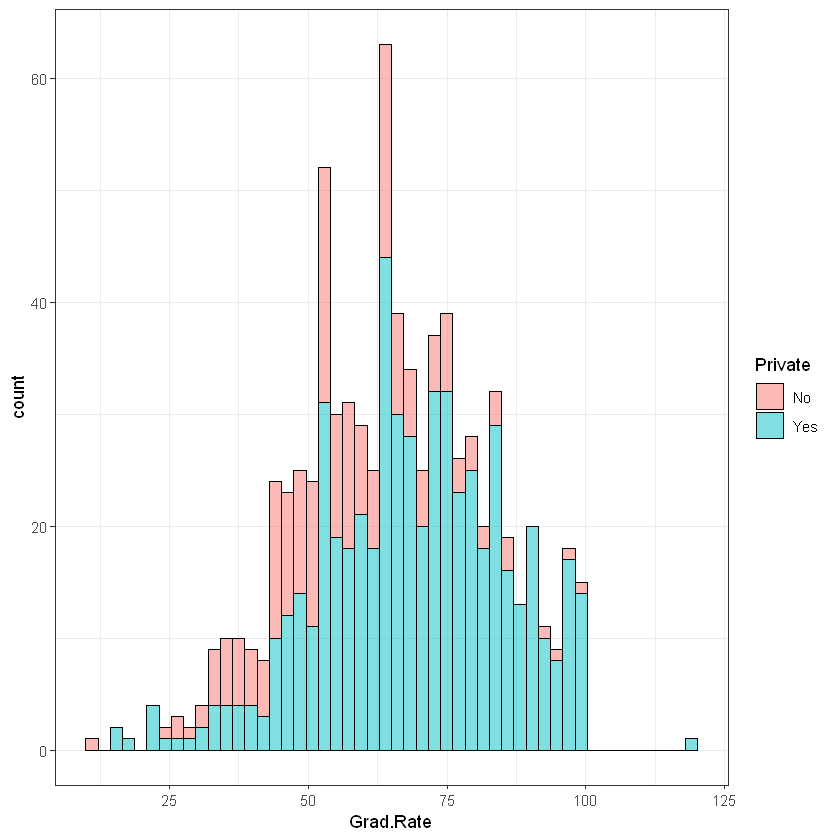

In [8]:
ggplot(df, aes(Grad.Rate)) + geom_histogram(aes(fill=Private), color='black', bins=50, alpha=0.5) + theme_bw()

### Cleaning the data

In [9]:
subset(df, Grad.Rate > 100)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [10]:
df['Cazenovia College','Grad.Rate'] <- 100
subset(df, Grad.Rate > 100)

Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


### Splitting the data

In [11]:
library(caTools)

In [12]:
set.seed(101)

sample <- sample.split(df$Private, SplitRatio = 0.7)
train <- subset(df, sample == T)
test <- subset(df, sample == F)

### Building the model

#### Decision Tree Model

In [13]:
library(rpart)

In [14]:
tree <- rpart(Private ~ ., method='class', data = train)
summary(tree)

Call:
rpart(formula = Private ~ ., data = train, method = "class")
  n= 544 

          CP nsplit rel error    xerror       xstd
1 0.48648649      0 1.0000000 1.0000000 0.07013217
2 0.21621622      1 0.5135135 0.5945946 0.05803134
3 0.02702703      2 0.2972973 0.3581081 0.04673234
4 0.02027027      3 0.2702703 0.3918919 0.04863747
5 0.01000000      8 0.1554054 0.3918919 0.04863747

Variable importance
F.Undergrad      Enroll      Accept        Apps    Outstate P.Undergrad 
         17          15          13          11          10           8 
  S.F.Ratio  Room.Board      Expend   Grad.Rate   Top10perc   Top25perc 
          7           5           4           4           3           1 

Node number 1: 544 observations,    complexity param=0.4864865
  predicted class=Yes  expected loss=0.2720588  P(node) =1
    class counts:   148   396
   probabilities: 0.272 0.728 
  left son=2 (164 obs) right son=3 (380 obs)
  Primary splits:
      F.Undergrad < 2992.5  to the right, improve=94.012

In [15]:
tree.pred <- predict(tree, test)
head(tree.pred)

,No,Yes
Adrian College,0.003311258,0.9966887
Alfred University,0.003311258,0.9966887
Allegheny College,0.003311258,0.9966887
Allentown Coll. of St. Francis de Sales,0.003311258,0.9966887
Alma College,0.003311258,0.9966887
Amherst College,0.003311258,0.9966887


In [16]:
tree.pred <- as.data.frame(tree.pred)

joiner <- function(x){
    if(x >= 0.5){
        return('Yes')
    }else{
        return('No')
    }
}

tree.pred$Private <- sapply(tree.pred$Yes, joiner)

head(tree.pred)

,No,Yes,Private
,<dbl>,<dbl>,<chr>
Adrian College,0.003311258,0.9966887,Yes
Alfred University,0.003311258,0.9966887,Yes
Allegheny College,0.003311258,0.9966887,Yes
Allentown Coll. of St. Francis de Sales,0.003311258,0.9966887,Yes
Alma College,0.003311258,0.9966887,Yes
Amherst College,0.003311258,0.9966887,Yes


##### Confusion Matrix

In [17]:
table(tree.pred$Private, test$Private)

     
       No Yes
  No   57   9
  Yes   7 160

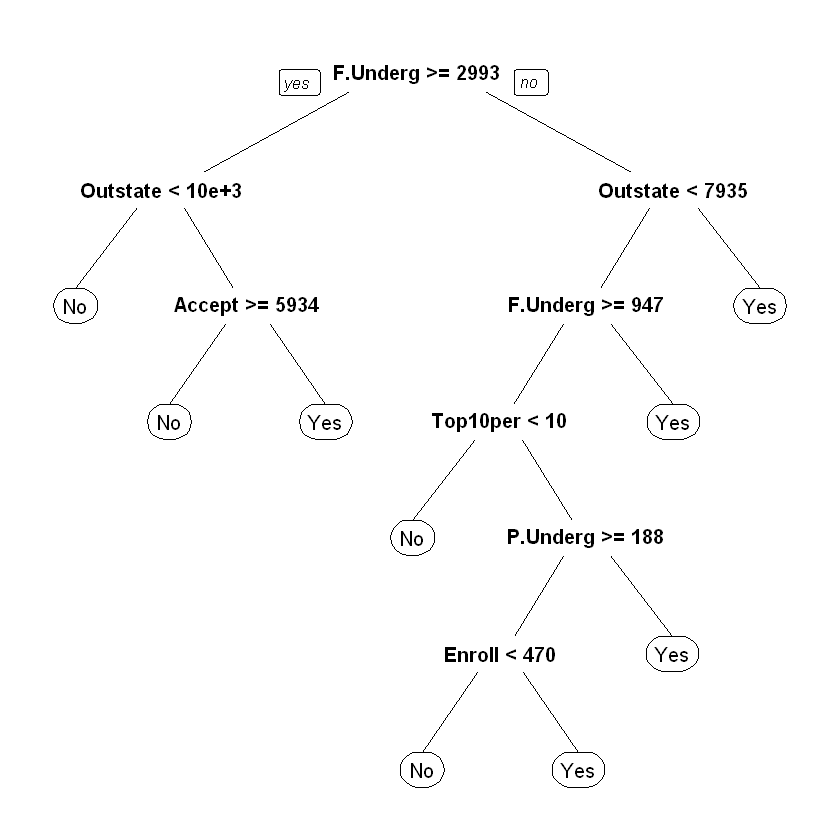

In [18]:
library(rpart.plot)
prp(tree)

### Random Forest Model

In [19]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin




In [21]:
rf.model <- randomForest(Private ~ ., data = train, importance=T)

###### On training data

In [23]:
rf.model$confusion

,No,Yes,class.error
No,126,22,0.14864865
Yes,11,385,0.02777778


In [24]:
rf.model$importance

,No,Yes,MeanDecreaseAccuracy,MeanDecreaseGini
Apps,0.027023368,0.0144591815,1.788576e-02,9.911467
Accept,0.022457400,0.0184208127,1.950414e-02,12.311540
Enroll,0.036086234,0.0282111731,3.032941e-02,21.469318
Top10perc,0.009092340,0.0037083162,5.255904e-03,5.398735
Top25perc,0.006915374,0.0044016998,5.072015e-03,4.338793
F.Undergrad,0.146434757,0.0707910208,9.143137e-02,40.064080
P.Undergrad,0.049114954,0.0052862586,1.711715e-02,15.760030
Outstate,0.155568597,0.0628578847,8.813290e-02,43.450385
Room.Board,0.015919932,0.0128922392,1.372498e-02,10.947612
Books,0.001674122,-0.0006206474,1.910262e-06,2.021444


##### Confusion Matrix

In [25]:
rf.pred <- predict(rf.model,test)
table(rf.pred, test$Private)

       
rf.pred  No Yes
    No   57   6
    Yes   7 163

## END!!!